### Piston model:


### $P = \frac{2\cdot p_0}{\mathbf{\overrightarrow{tp}}} \cdot \frac{J_1(k\cdot r\cdot \textrm{sin}\theta)}{k\cdot r\cdot \textrm{sin}\theta}\cdot e^{(i\cdot k\cdot \mathbf{\overrightarrow{tp}})}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from holopy.utils.functions import points_vector_builder, focus_phasemap_builder
from holopy.utils.plotting import *
from holopy.algorithms.piston_model import *

In [2]:
c0 = 343              # sound speed [m/s]
f = 40000             # frequency [Hz]
lam = c0 / f          # wavelength [m]
k = 2 * np.pi / lam   # angular wavenumber [rads/m]
resolution = 4

# ---> transducer plane <---
hex_points = hexagon_diameter_to_coordinates(d=7)
tran_centrepoint = (0, 0, 0)
tran_normal = np.array([0, 0, 1])

# ----> xz_eval plane <----
dx_xz_eval = (lam/2)/resolution
xz_eval_centrepoint = (0, 0, 20*lam)
xz_eval_sidelengths = [(5*lam, 5*lam), (0, 0), (20*lam, 20*lam)] # [(-x, +x), (-y, +y), (-z, +z)]
xz_eval_points = points_vector_builder(xz_eval_centrepoint, xz_eval_sidelengths, dx_xz_eval)

# ----> xy_eval plane <----
dx_xy_eval = (lam/2)/resolution
xy_eval_centrepoint = (0, 0, 10*lam)              # make sure xy eval centre point matches zx eval centre point
xy_eval_sidelengths = [(5*lam, 5*lam), (5*lam, 5*lam), (0, 0)] # [(-x, +x), (-y, +y), (-z, +z)]
xy_eval_points = points_vector_builder(xy_eval_centrepoint, xy_eval_sidelengths, dx_xy_eval)

In [9]:
A_magnitude = 1


hex_focussing_phasemap = focus_phasemap_builder(hex_points, (0,0,10*lam), k)
# hex_focussing_phasemap = focus_phasemap_builder(hex_points, xy_eval_centrepoint, k)

# all transducers set to complex pressure with 0-phase  
# Pt = A_magnitude*np.ones((37))*np.exp(1j*np.zeros((37)))

# focussing transducer complex pressure
Pt = A_magnitude*np.ones((37))*np.exp(1j*hex_focussing_phasemap)

# ----> xz eval plane <----
tp_vec_xz = find_tp_vec(xz_eval_points, hex_points)
tp_mag_xz = vmag3D(tp_vec_xz.T).reshape(1, -1)
sin_theta_xz = find_sin_theta(tp_vec_xz, tran_normal)
H_xz = PM_propagator_function_builder(tp_mag_xz, sin_theta_xz, k) # propagator
H_xz = H_xz.reshape(37, -1)

# A_magnitude = 1
# Pt_xz = A_magnitude*np.ones((37))*np.exp(1j*np.zeros((37))) # transducer complex pressure
Pf_xz = np.dot(Pt, H_xz).reshape(pf_shape(xz_eval_sidelengths, resolution, lam)) # propagate to far field and reshape to evaluation plane array dim
Pf_xz = np.flipud(Pf_xz)

# ----> xy eval plane <----
tp_vec_xy = find_tp_vec(xy_eval_points, hex_points)
tp_mag_xy = vmag3D(tp_vec_xy.T).reshape(1, -1)
sin_theta_xy = find_sin_theta(tp_vec_xy, tran_normal)
H_xy = PM_propagator_function_builder(tp_mag_xy, sin_theta_xy, k) # propagator
H_xy = H_xy.reshape(37, -1)

# A_magnitude = 1
# Pt_xy = A_magnitude*np.ones((37))*np.exp(1j*np.zeros((37))) # transducer complex pressure
Pf_xy = np.dot(Pt, H_xy).reshape(pf_shape(xy_eval_sidelengths, resolution, lam)) # propagate to far field and reshape to array
Pf_xy = np.flipud(Pf_xy)

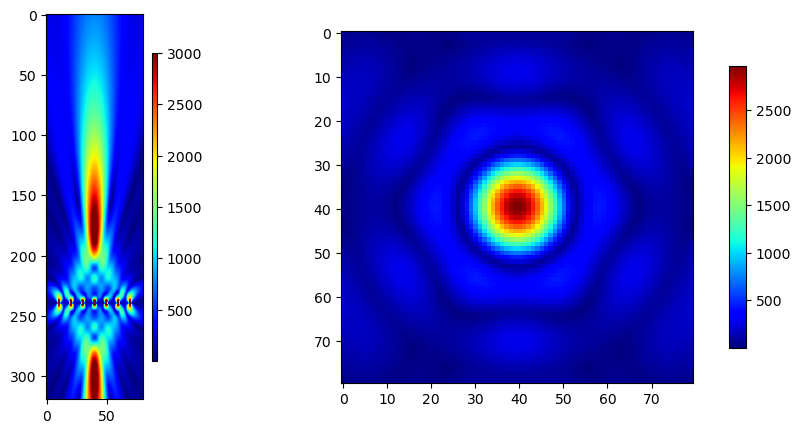

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

im1 = ax1.imshow(abs(Pf_xz), plt.get_cmap("jet"), vmax=3000)            # set max range
cax = ax1.inset_axes([1.1, 0.1, 0.05, 0.8]) # [x0, y0, width, height]
plt.colorbar(im1, cax=cax)

im2 = ax2.imshow(abs(Pf_xy), plt.get_cmap("jet"))
cax = ax2.inset_axes([1.1, 0.1, 0.05, 0.8]) # [x0, y0, width, height]
plt.colorbar(im2, cax=cax)

plt.show()